In [1]:
import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/car_prices-EU.csv')
df

,Brand,Model,Price,Country,Kilometers,Gearbox,Year,Fuel,Power,Seller,Body Type,Type,Drivetrain,Seats,Doors,Cylinders,Color,Upholstery
0,Fiat,Freemont,5100.0,IT,225282,Automatic,2013,Diesel,170.0,Dealer,Van,Used,4WD,7.0,5.0,4.0,Black,Full leather
1,Fiat,Panda,1995.0,NL,162076,Manual,2010,Gasoline,69.0,Dealer,Compact,Used,Front,4.0,5.0,4.0,Grey,Cloth
2,Fiat,Panda,2995.0,NL,53914,Manual,2006,Gasoline,60.0,Dealer,Compact,Used,Front,4.0,5.0,4.0,Black,NaN
3,Fiat,Grande Punto,1450.0,NL,238642,Manual,2006,Gasoline,95.0,Dealer,Compact,Used,Front,5.0,5.0,4.0,Black,Cloth
4,Fiat,500X,8900.0,IT,199000,Manual,2017,LPG,120.0,Dealer,Off-Road/Pick-up,Used,Front,5.0,5.0,4.0,White,Part leather
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,Corvette,C7,65000.0,DE,20064,NaN,2015,Gasoline,466.0,Private seller,Coupe,Used,NaN,2.0,3.0,NaN,Blue,Velour
12900,Corvette,C8,144900.0,AT,3500,Automatic,2021,Electric/Gasoline,503.0,Dealer,Convertible,Used,Rear,2.0,2.0,NaN,Blue,Full leather
12901,Corvette,Z06,70500.0,DE,29874,Automatic,2015,Gasoline,659.0,Dealer,Convertible,Used,NaN,2.0,2.0,NaN,Blue,Full leather
12902,Corvette,C3,21800.0,AT,85000,Manual,1971,Gasoline,277.0,Private seller,Convertible,Used,Rear,2.0,2.0,8.0,Yellow,Other


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12904 entries, 0 to 12903
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       12904 non-null  object 
 1   Model       12821 non-null  object 
 2   Price       12894 non-null  float64
 3   Country     12894 non-null  object 
 4   Kilometers  12771 non-null  object 
 5   Gearbox     12813 non-null  object 
 6   Year        12429 non-null  object 
 7   Fuel        12895 non-null  object 
 8   Power       12792 non-null  float64
 9   Seller      12902 non-null  object 
 10  Body Type   12904 non-null  object 
 11  Type        12903 non-null  object 
 12  Drivetrain  9750 non-null   object 
 13  Seats       12297 non-null  float64
 14  Doors       12639 non-null  float64
 15  Cylinders   10161 non-null  float64
 16  Color       12406 non-null  object 
 17  Upholstery  11094 non-null  object 
dtypes: float64(5), object(13)
memory usage: 1.8+ MB


Cambiar el tipo de las columnas de 'object' a 'category' para que pesen menos y para mejorar el tiempo de procesamiento

In [4]:
categories = ['Brand', 'Model', 'Country', 'Gearbox','Fuel', 'Seller', 'Body Type', 'Type', 'Drivetrain', 'Color', 'Upholstery']
for col in categories:
    df[col] = df[col].astype('category')

In [5]:
df['Brand'].value_counts()

Brand
Suzuki           400
CUPRA            400
Land-Rover       400
Jeep             400
Jaguar           400
Kia              399
Hyundai          399
Toyota           399
SEAT             399
Renault          399
Peugeot          399
Opel             399
Nissan           399
Mercedes-Benz    399
Lexus            399
Volvo            399
Honda            399
Dacia            399
Audi             399
BMW              399
Cadillac         399
Ford             399
Citroen          399
Chevrolet        399
Dodge            399
Fiat             399
Skoda            398
Tesla            398
Alfa-Romeo       398
Volkswagen       379
Maserati         119
Corvette         119
Ferrari          119
Porsche          119
Lamborghini      119
Rolls-Royce      119
Bentley          119
Aston-Martin     119
Name: count, dtype: int64

In [6]:
# Calcular frecuencia de cada marca
brand_counts = df['Brand'].value_counts()
print("Marcas ordenadas por frecuencia:")
print(brand_counts.head(10))

# Crear mapeo: más frecuente → número más bajo
frequency_order = brand_counts.index.tolist()
encoding_dict = {brand: i for i, brand in enumerate(frequency_order)}

# Aplicar encoding
companias_encoded = df['Brand'].map(encoding_dict)
df.insert(1, 'Brand_c' , companias_encoded)

Marcas ordenadas por frecuencia:
Brand
Suzuki        400
CUPRA         400
Land-Rover    400
Jeep          400
Jaguar        400
Kia           399
Hyundai       399
Toyota        399
SEAT          399
Renault       399
Name: count, dtype: int64


In [7]:
df['Country'].unique()

['IT', 'NL', 'BE', 'DE', 'AT', 'ES', 'LU', NaN, 'FR']
Categories (8, object): ['AT', 'BE', 'DE', 'ES', 'FR', 'IT', 'LU', 'NL']

In [8]:
# borrar las lineas que tienen más de 3 columnas vacias
df = df[df.isna().sum(axis=1) <= 3]

# cambiar el año a 2025 y los kilometros a 0 si no existen y el coche es de tipo nuevo
df.loc[df['Year'].isna() & (df['Type'] == 'New') & (df['Kilometers'].isna()), 'Kilometers'] = 0
df.loc[df['Year'].isna() & (df['Type'] == 'New'), 'Year'] = 2025

# Borrar las lineas que no tienen año ni modelo
df = df.dropna(subset=['Year'])
df = df.dropna(subset= ['Model'])

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# Si es antiguo (<=2013) y no tiene Gearbox, asumir Manual
df.loc[df['Gearbox'].isna() & (df['Year'] <= 2013), 'Gearbox'] = 'Manual'

# Si es moderno (>2013) y no tiene Gearbox, asumir Automatic
df.loc[df['Gearbox'].isna() & (df['Year'] > 2013), 'Gearbox'] = 'Automatic'

# añadir la moda
df['Fuel'] = df['Fuel'].fillna(df['Fuel'].mode()[0])

df.loc[df['Drivetrain'].isna() & (df['Power'] <= 200), 'Drivetrain'] = 'Front'
df.loc[df['Drivetrain'].isna() & (df['Power'] > 200), 'Drivetrain'] = '4WD'

# borrar las columnas incompletas y no necesarias
df = df.dropna(subset = ['Power'])

# sustituir NaN con la moda
df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])
df['Doors'] = df['Doors'].fillna(df['Doors'].mode()[0])
df['Upholstery'] = df['Upholstery'].fillna(df['Upholstery'].mode()[0])
df['Color'] = df['Color'].fillna(df['Color'].mode()[0])


In [9]:
mapping = {cat: i for i, cat in enumerate(df['Country'].value_counts().index)}
df['Country_c'] = df['Country'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Gearbox'].value_counts().index)}
df['Gearbox_c'] = df['Gearbox'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Fuel'].value_counts().index)}
df['Fuel_c'] = df['Fuel'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Seller'].value_counts().index)}
df['Seller_c'] = df['Seller'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Type'].value_counts().index)}
df['Type_c'] = df['Type'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Drivetrain'].value_counts().index)}
df['Drivetrain_c'] = df['Drivetrain'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Upholstery'].value_counts().index)}
df['Upholstery_c'] = df['Upholstery'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Color'].value_counts().index)}
df['Color_c'] = df['Color'].map(mapping)

In [10]:
# por error habian unos coche donde en la columna Body type tenian valores : White, Red...
# borramos estos registros y mappeamos la columna
df.drop(df[df['Body Type'].str.contains('White|Red|Grey|Silver|Black|Green', case=False, na=False)].index, inplace=True)

'''bad_body_types = ['White','Red','Grey','Silver','Black','Green']
mask = df['Body Type'].isin( bad_body_types)
df = df.drop(df[mask].index)'''

mapping = {cat: i for i, cat in enumerate(df['Body Type'].value_counts().index)}
df['Body_Type_c'] = df['Body Type'].map(mapping)

In [11]:
df['Color'].value_counts()

Color
Black     3659
Grey      3174
White     2287
Blue      1137
Silver     670
Red        649
Green      280
Brown      169
Beige      114
Orange      74
Yellow      65
Violet      47
Bronze      27
Gold        23
Name: count, dtype: int64

In [14]:
# Borrar las columnas no numericas y innecesarias
df = df.drop(columns=['Brand', 'Country','Cylinders','Gearbox','Fuel','Seller','Body Type', 'Type', 'Drivetrain', 'Color', 'Upholstery'])

In [ ]:
model_target_mean = df.groupby('Model')['Price'].mean()
model_target_mean.head(60)
df['Model_target'] = df['Model'].map(model_target_mean)

/var/folders/91/wflhcz1d2fs_wzg7lpz74zr80000gn/T/ipykernel_1872/1392005596.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_target_mean = df.groupby('Model')['Price'].mean()


Model
106              666.000000
107             3208.333333
108             7518.222222
114            10480.000000
116            11136.533333
118            14671.117647
120            18952.857143
124 Spider     21645.000000
126             3900.000000
147             3300.000000
156            13933.333333
159             4956.363636
166             3050.000000
2008           15791.042857
206             2013.000000
207             3356.500000
208            14332.826667
216            12209.750000
218            18415.823529
220            20466.333333
225            17775.000000
244             4990.000000
296           348700.000000
296 GTB       322435.000000
3008           19004.227273
307             2183.000000
308            12772.048780
316            13856.750000
318            16475.095238
320            17946.842105
3200           25899.000000
325             5485.000000
328            22980.000000
330            26925.409091
335            21324.500000
340           

In [20]:
df['Model'].value_counts().head(60)

Model
Formentor             242
Model 3               193
Leon                  190
Qashqai               176
Duster                159
RAM                   158
Compass               148
C3                    138
Sandero               120
Stelvio               116
Range Rover Evoque    116
Renegade              111
Vitara                110
F-Pace                108
Sportage              108
CR-V                  104
Corsa                  99
Escalade               96
TUCSON                 96
Civic                  92
XC60                   92
Ibiza                  92
E-Pace                 91
Clio                   90
Golf                   87
Arona                  85
Ateca                  83
A3                     81
Octavia                81
Yaris                  79
Swift                  79
Panda                  78
Focus                  77
Challenger             77
UX 250h                76
Discovery Sport        75
208                    75
HR-V                   74
500   

In [ ]:
df.to_csv('../data/processed/car_prices_procc.csv')

<Axes: xlabel='Price', ylabel='Count'>

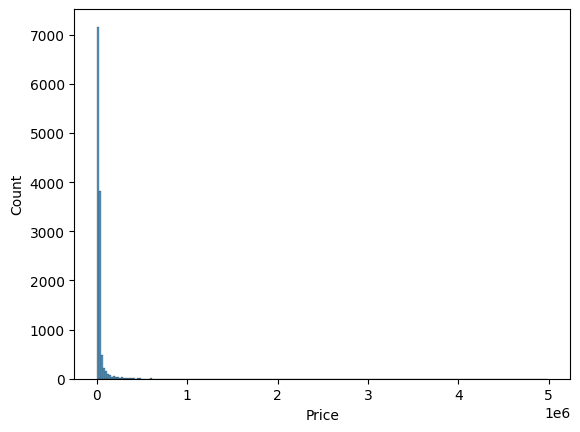

In [12]:
sns.histplot(df['Price'])

<Axes: ylabel='Price'>

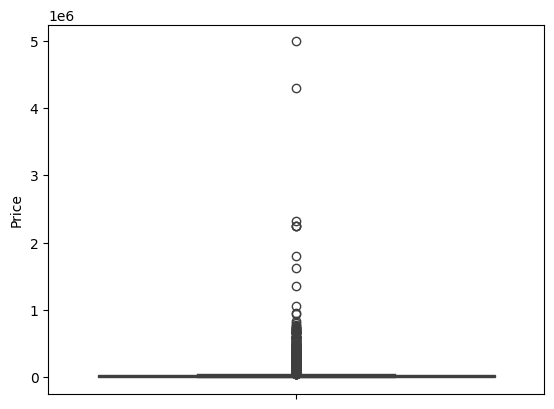

In [16]:
sns.boxplot(df['Price'])

In [20]:
df_coches_caros = df[df['Price']>80000]
df_coches_caros

,Brand,Brand_code,Model,Price,Country,Kilometers,Gearbox,Year,Fuel,Power,Seller,Body Type,Type,Drivetrain,Seats,Doors,Cylinders,Color,Upholstery
2467,Honda,21,NSX,237500.0,BE,5468,Automatic,2019,Gasoline,507.0,Dealer,Sedan,Used,4WD,2.0,2.0,6.0,Black,Full leather
2615,Honda,21,NSX,94890.0,DE,156852,Manual,1994,Gasoline,273.0,Dealer,Coupe,Used,Rear,2.0,5.0,6.0,Black,Full leather
3922,Volvo,18,XC90,94680.0,DE,5,Automatic,2024,Electric/Gasoline,455.0,Dealer,Off-Road/Pick-up,Demonstration,4WD,7.0,5.0,4.0,Black,Full leather
3933,Volvo,18,XC90,89990.0,AT,8000,Automatic,2024,Electric/Gasoline,310.0,Dealer,Off-Road/Pick-up,Demonstration,4WD,7.0,5.0,NaN,Black,Full leather
3944,Volvo,18,XC90,86240.0,DE,9900,Automatic,2024,Electric/Gasoline,455.0,Dealer,Off-Road/Pick-up,Demonstration,4WD,7.0,5.0,4.0,Grey,Full leather
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,Corvette,37,C8,199980.0,DE,15,Automatic,NaN,Gasoline,646.0,Dealer,Coupe,New,Rear,2.0,2.0,NaN,Grey,Full leather
12891,Corvette,37,C1,89900.0,DE,2800,Manual,1962,Gasoline,250.0,Dealer,Convertible,Used,NaN,2.0,2.0,NaN,Black,Full leather
12895,Corvette,37,C8,94990.0,BE,11080,Automatic,2023,Gasoline,481.0,Dealer,Convertible,Used,4WD,2.0,2.0,NaN,Black,alcantara
12896,Corvette,37,C8,86990.0,DE,33846,Automatic,2022,Gasoline,496.0,Dealer,Coupe,Used,NaN,2.0,4.0,8.0,Grey,Full leather


<Axes: xlabel='Kilometers', ylabel='Price'>

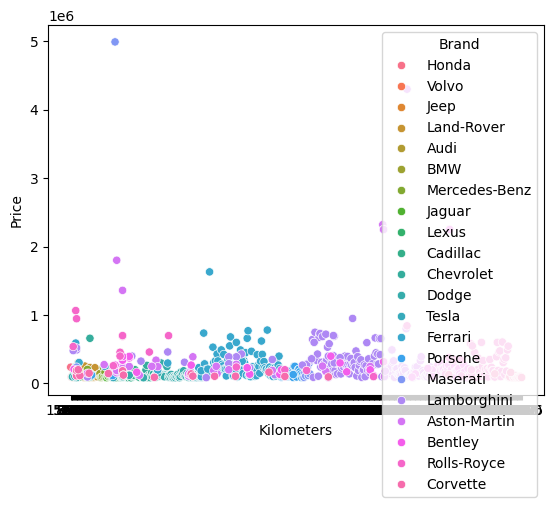

In [ ]:

sns.scatterplot(df[], y='Price', x='Kilometers', hue='Brand')